In [1]:
using Pkg, Random, Printf
using Laplacians, LinearAlgebra, StatsBase, SparseArrays
using Plots, ProgressMeter

In [2]:
Random.seed!(111)
gr()

Plots.GRBackend()

In [3]:
println("Julia version: $VERSION")
Lap_ver = Pkg.installed()["Laplacians"]
println("Laplacians.jl version: $Lap_ver")

Julia version: 1.1.0
Laplacians.jl version: 1.1.0


In [4]:
function benchmark_lap(graph_sizes, sparsity; tol=1e-6, verbose=true)
    Results = Dict()

    @showprogress for n in graph_sizes
        if verbose println("======= Graph size: $n x $n =======") end
        A = subsampleEdges(complete_graph(n), sparsity)
        L = lap(A)
        b = randn(n); b .-= mean(b)

        for lapsolver in LapSolvers
            if verbose println("======= Solver $lapsolver ======= ",) end

            sname = nameof(lapsolver)
            if !haskey(Results, sname)
                Results[sname] = Dict("build_time" => [],
                                      "solve_time" => [],
                                     "build_alloc" => [],
                                     "solve_alloc" => [])
            end

            # Take the average over a couple runs
            n_runs = 5
            bt = bb = st = sb = 0
            for i in 1:n_runs
                solve, t, bytes, _, _ = @timed lapsolver(A, tol=tol)
                bt += (t/n_runs)
                bb += (bytes/n_runs)

                x, t, bytes, _, _ = @timed solve(b)
                st += (t/n_runs)
                sb += (bytes/n_runs)

                if verbose
                    println("Relative norm: ", norm(L * x - b) / norm(b))
                end
            

            end
            
            bb /= 1e6; sb /= 1e6;
            if verbose println("Build time: $(@sprintf("%.3f", bt)), Build alloc: $(@sprintf("%.2f", bb)) MB, Solve time: $(@sprintf("%.3f", st)), Solve alloc: $(@sprintf("%.2f", sb)) MB \n") end
            
            push!(Results[sname]["build_time"], bt)
            push!(Results[sname]["build_alloc"], bb)
            push!(Results[sname]["solve_time"], st)
            push!(Results[sname]["solve_alloc"], sb)

        end
    end

    # Plot results for all solvers, varying graph size
    labels = []
    build_times = []; build_allocs = []; solve_times = []; solve_allocs = []

    for (solver, result) in Results
        push!(labels, solver)
        push!(build_times, result["build_time"])
        push!(build_allocs, result["build_alloc"])
        push!(solve_times, result["solve_time"])
        push!(solve_allocs, result["solve_alloc"])
    end

    p1 = plot(graph_sizes, build_times, labels=labels, legend=:topleft, title="build_times", xaxis="n vertices", yaxis="seconds")
    p2 = plot(graph_sizes, build_allocs, labels=labels, legend=:topleft,  title="build_allocations", xaxis="n vertices", yaxis="MB")
    p3 = plot(graph_sizes, solve_times, labels=labels, legend=:topleft, title="solve_times", xaxis="n vertices", yaxis="seconds")
    p4 = plot(graph_sizes, solve_allocs, labels=labels, legend=:topleft,  title="solve_allocations", xaxis="n vertices", yaxis="MB")

    plot(p1, p2, p3, p4, layout=(2,2), size=(900, 600))
end

benchmark_lap (generic function with 1 method)

### Laplacian solver, dense matrices (70% non-zeros)

======= Graph size: 100 x 100 =======
======= Solver Laplacians.approxchol_lap ======= 
Relative norm: 4.789137449528422e-7
Relative norm: 2.652607191585565e-7
Relative norm: 1.2408085541037197e-7
Relative norm: 7.907562581681622e-7
Relative norm: 2.826310220829467e-7
Build time: 0.190, Build alloc: 33.66 MB, Solve time: 0.044, Solve alloc: 10.77 MB 

======= Solver Laplacians.augTreeLap ======= 
Relative norm: 6.378756377569644e-7
Relative norm: 5.625517254706738e-7
Relative norm: 7.521025428358711e-7
Relative norm: 7.827493241457776e-7
Relative norm: 6.916380669573071e-7
Build time: 0.498, Build alloc: 87.76 MB, Solve time: 0.046, Solve alloc: 8.18 MB 

======= Solver Laplacians.KMPLapSolver ======= 
Relative norm: 4.236973520712908e-16
Relative norm: 4.236973520712908e-16
Relative norm: 4.236973520712908e-16
Relative norm: 4.236973520712908e-16
Relative norm: 4.236973520712908e-16
Build time: 0.074, Build alloc: 15.61 MB, Solve time: 0.000, Solve alloc: 0.01 MB 

======= Solver Lapl

Progress:  33%|█████████████▋                           |  ETA: 0:00:10

======= Solver Laplacians.approxchol_lap ======= 
Relative norm: 7.049924422075009e-7
Relative norm: 5.326809656561955e-7
Relative norm: 2.2000611143810394e-7
Relative norm: 4.5496947109938083e-7
Relative norm: 3.785005108118204e-7
Build time: 0.191, Build alloc: 83.43 MB, Solve time: 0.015, Solve alloc: 0.18 MB 

======= Solver Laplacians.augTreeLap ======= 
Relative norm: 8.372543570413247e-7
Relative norm: 5.882766165050724e-7
Relative norm: 7.60090552789469e-7
Relative norm: 7.115580840509583e-7
Relative norm: 6.402780059442606e-7
Build time: 0.183, Build alloc: 295.13 MB, Solve time: 0.029, Solve alloc: 5.92 MB 

======= Solver Laplacians.KMPLapSolver ======= 
Relative norm: 9.711631538947977e-7
Relative norm: 7.854323255487754e-7
Relative norm: 9.460203915496317e-7
Relative norm: 8.198311873685637e-7
Relative norm: 8.606247527539995e-7
Build time: 0.299, Build alloc: 336.46 MB, Solve time: 0.085, Solve alloc: 51.49 MB 

======= Solver Laplacians.cgLapSolver ======= 
Relative norm

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:05

======= Solver Laplacians.approxchol_lap ======= 
Relative norm: 5.258428189109502e-7
Relative norm: 3.2490502712246236e-7
Relative norm: 6.209887527926023e-7
Relative norm: 6.198319906759789e-7
Relative norm: 5.321568784374011e-7
Build time: 29.877, Build alloc: 8357.45 MB, Solve time: 1.463, Solve alloc: 1.68 MB 

======= Solver Laplacians.augTreeLap ======= 
Relative norm: 6.158937772519356e-7
Relative norm: 6.823510126226604e-7
Relative norm: 6.494002556860268e-7
Relative norm: 7.104084966259022e-7
Relative norm: 8.169298753943105e-7
Build time: 24.662, Build alloc: 28425.67 MB, Solve time: 8.633, Solve alloc: 86.79 MB 

======= Solver Laplacians.KMPLapSolver ======= 
Relative norm: 9.995582275044e-7
Relative norm: 9.889879625746197e-7
Relative norm: 9.055611556050244e-7
Relative norm: 7.458869375252872e-7
Relative norm: 9.936610675028928e-7
Build time: 21.426, Build alloc: 31428.25 MB, Solve time: 6.348, Solve alloc: 5097.02 MB 

======= Solver Laplacians.cgLapSolver ======= 
Rela

Progress: 100%|█████████████████████████████████████████| Time: 0:08:02


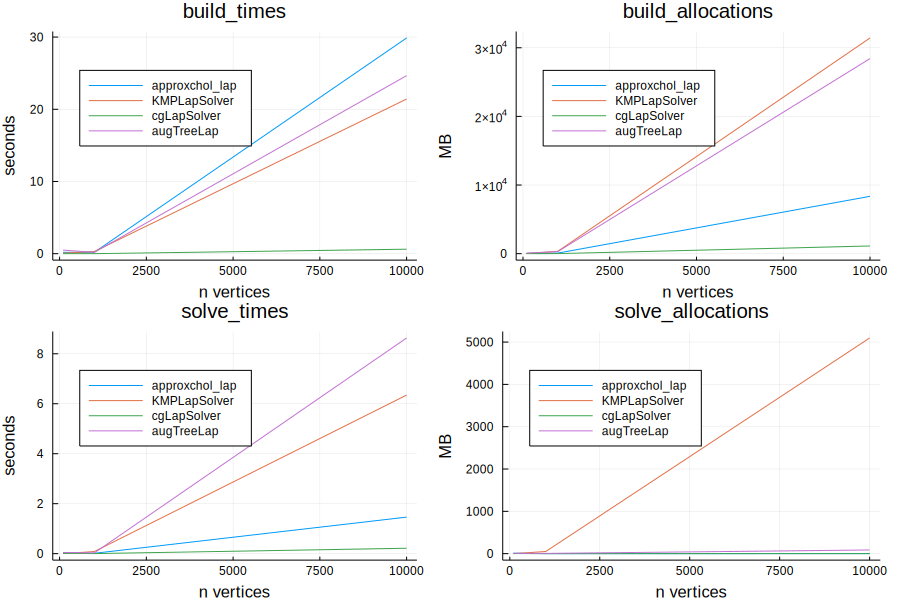

In [5]:
graph_sizes = Array{Int64}([1e2, 1e3, 1e4])
benchmark_lap(graph_sizes, 0.7)

### Laplacian solver, sparse matrices (10% non-zeros)

======= Graph size: 100 x 100 =======
======= Solver Laplacians.approxchol_lap ======= 
Relative norm: 2.8383607770879515e-7
Relative norm: 7.387292038153717e-7
Relative norm: 3.046842405448642e-7
Relative norm: 3.7020259475677916e-7
Relative norm: 7.022602095221405e-7
Build time: 0.000, Build alloc: 0.16 MB, Solve time: 0.000, Solve alloc: 0.02 MB 

======= Solver Laplacians.augTreeLap ======= 
Relative norm: 7.788636147997808e-7
Relative norm: 8.131465953115734e-7
Relative norm: 6.732025310379016e-7
Relative norm: 8.366501423100475e-7
Relative norm: 7.585878070507369e-7
Build time: 0.001, Build alloc: 0.76 MB, Solve time: 0.000, Solve alloc: 0.30 MB 

======= Solver Laplacians.KMPLapSolver ======= 
Relative norm: 1.2762976695383283e-15
Relative norm: 1.2762976695383283e-15
Relative norm: 1.2762976695383283e-15
Relative norm: 1.2762976695383283e-15
Relative norm: 1.2762976695383283e-15
Build time: 0.000, Build alloc: 0.15 MB, Solve time: 0.000, Solve alloc: 0.01 MB 

======= Solver La

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:00

======= Solver Laplacians.approxchol_lap ======= 
Relative norm: 3.7997908708902567e-7
Relative norm: 6.054029424857931e-7
Relative norm: 3.9210629100999623e-7
Relative norm: 2.0701011525763557e-7
Relative norm: 4.428966556091358e-7
Build time: 5.901, Build alloc: 1312.64 MB, Solve time: 0.390, Solve alloc: 1.71 MB 

======= Solver Laplacians.augTreeLap ======= 
Relative norm: 9.837252030759774e-7
Relative norm: 9.896491923771617e-7
Relative norm: 9.780271889897389e-7
Relative norm: 9.875483101566348e-7
Relative norm: 9.621127451847875e-7
Build time: 3.800, Build alloc: 4264.95 MB, Solve time: 2.449, Solve alloc: 234.91 MB 

======= Solver Laplacians.KMPLapSolver ======= 
Relative norm: 9.718404328594607e-7
Relative norm: 9.63508080691299e-7
Relative norm: 9.959336126809739e-7
Relative norm: 9.98436365173999e-7
Relative norm: 9.791863801502361e-7
Build time: 3.748, Build alloc: 4676.08 MB, Solve time: 3.535, Solve alloc: 5649.07 MB 

======= Solver Laplacians.cgLapSolver ======= 
Relat

Progress: 100%|█████████████████████████████████████████| Time: 0:01:43


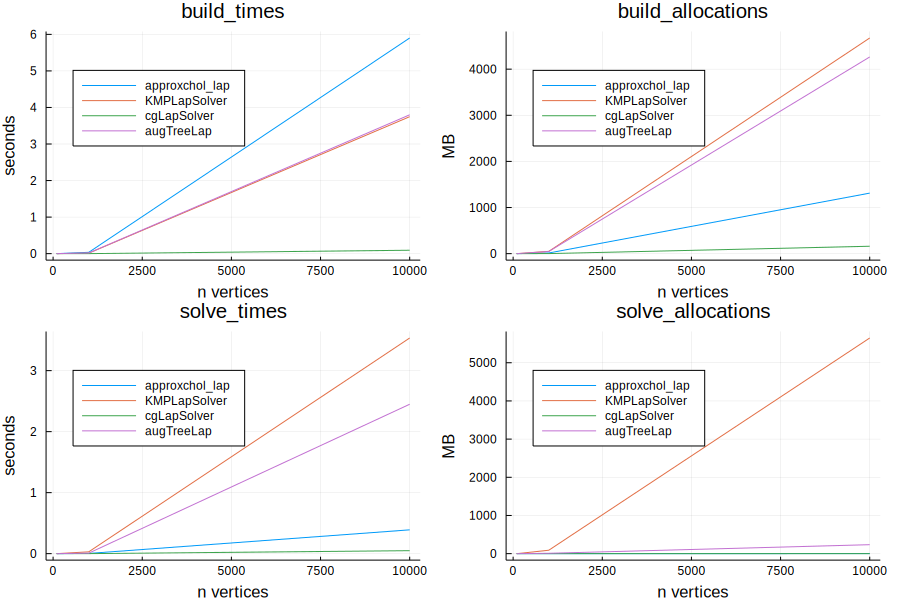

In [6]:
benchmark_lap(graph_sizes, 0.1)

In [7]:
function benchmark_sddm(matrix_sizes, sparsity; tol=1e-6, verbose=true)
    Results = Dict()

    @showprogress for n in matrix_sizes
        if verbose println("======= Graph size: $n x $n =======") end

        A = subsampleEdges(complete_graph(n), sparsity)
        L = lap(A)
        dval = zeros(n); dval[1] = dval[n] = 1e-3;
        SDDM = L + spdiagm(0=>dval)
        b = randn(n); b .-= mean(b)

        for sddmsolver in [augTreeSddm, KMPSDDMSolver, approxchol_sddm]
            if verbose println("======= Solver $sddmsolver =======") end

            sname = nameof(sddmsolver)
            if !haskey(Results, sname)
                Results[sname] = Dict("build_time" => [],
                                      "solve_time" => [],
                                     "build_alloc" => [],
                                     "solve_alloc" => [])
            end

            # Take the average over a couple runs 
            n_runs = 5
            bt = bb = st = sb = 0
            for i in 1:n_runs
                solve, t, bytes, _, _ = @timed sddmsolver(SDDM, tol=tol, verbose=verbose)
                bt += (t/n_runs)
                bb += (bytes/n_runs)

                x, t, bytes, _, _ = @timed solve(b)
                st += (t/n_runs)
                sb += (bytes/n_runs)

                if verbose
                    println("Relative norm: ", norm(SDDM * x - b) / norm(b))
                end
            
            end
            bb /= 1e6; sb /= 1e6;
            if verbose println("Build time: $(@sprintf("%.3f", bt)), Build alloc: $(@sprintf("%.2f", bb)) MB, Solve time: $(@sprintf("%.3f", st)), Solve alloc: $(@sprintf("%.2f", sb)) MB \n") end
            
            push!(Results[sname]["build_time"], bt)
            push!(Results[sname]["build_alloc"], bb)
            push!(Results[sname]["solve_time"], st)
            push!(Results[sname]["solve_alloc"], sb)

        end
    end

    # Plot results for all solvers, varying graph size
    labels = []
    build_times = []; build_allocs = []; solve_times = []; solve_allocs = []

    for (solver, result) in Results
        sname = if (string(solver) == "#155") "approxchol_sddm" else solver end
        push!(labels, sname)
        push!(build_times, result["build_time"])
        push!(build_allocs, result["build_alloc"])
        push!(solve_times, result["solve_time"])
        push!(solve_allocs, result["solve_alloc"])
    end

    p1 = plot(matrix_sizes, build_times, labels=labels, legend=:topleft, title="build_times", xaxis="n vertices", yaxis="seconds")
    p2 = plot(matrix_sizes, build_allocs, labels=labels, legend=:topleft,  title="build_allocations", xaxis="n vertices", yaxis="MB")
    p3 = plot(matrix_sizes, solve_times, labels=labels, legend=:topleft, title="solve_times", xaxis="n vertices", yaxis="seconds")
    p4 = plot(matrix_sizes, solve_allocs, labels=labels, legend=:topleft,  title="solve_allocations", xaxis="n vertices", yaxis="MB")

    plot(p1, p2, p3, p4, layout=(2,2), size=(900, 600))
end

benchmark_sddm (generic function with 1 method)

### SDDM solver, dense matrices (70% non-zeros)

======= Graph size: 100 x 100 =======
======= Solver Laplacians.augTreeSddm =======
Solver build time: 0.038 seconds.
PCG stopped after: 0.0 seconds and 26 iterations with relative error 7.8478381200535e-7.
Relative norm: 7.84783811955024e-7
Solver build time: 0.001 seconds.
PCG stopped after: 0.0 seconds and 30 iterations with relative error 6.753458207378281e-7.
Relative norm: 6.753458207958436e-7
Solver build time: 0.001 seconds.
PCG stopped after: 0.0 seconds and 29 iterations with relative error 5.245866417644905e-7.
Relative norm: 5.245866417051616e-7
Solver build time: 0.001 seconds.
PCG stopped after: 0.0 seconds and 30 iterations with relative error 5.168852771636064e-7.
Relative norm: 5.168852771070583e-7
Solver build time: 0.005 seconds.
PCG stopped after: 0.0 seconds and 28 iterations with relative error 6.9595622943515e-7.
Relative norm: 6.959562294888766e-7
Build time: 0.124, Build alloc: 33.41 MB, Solve time: 0.012, Solve alloc: 3.08 MB 

======= Solver Laplacians.KMPSDD

Progress:  33%|█████████████▋                           |  ETA: 0:00:05

Solver build time: 0.214 seconds.
PCG stopped after: 0.033 seconds and 68 iterations with relative error 6.557387561448949e-7.
Relative norm: 6.55738756124458e-7
Solver build time: 0.21 seconds.
PCG stopped after: 0.031 seconds and 65 iterations with relative error 9.348443344414307e-7.
Relative norm: 9.348443344401299e-7
Solver build time: 0.249 seconds.
PCG stopped after: 0.032 seconds and 66 iterations with relative error 9.95794970519071e-7.
Relative norm: 9.957949705305948e-7
Solver build time: 0.242 seconds.
PCG stopped after: 0.032 seconds and 67 iterations with relative error 8.385096614528676e-7.
Relative norm: 8.385096613294622e-7
Solver build time: 0.242 seconds.
PCG stopped after: 0.031 seconds and 65 iterations with relative error 8.418539071666801e-7.
Relative norm: 8.418539071820483e-7
Build time: 0.232, Build alloc: 312.14 MB, Solve time: 0.032, Solve alloc: 4.31 MB 

======= Solver Laplacians.KMPSDDMSolver =======
akpw stretch : 2.74152914969923
aveStretch : 2.74652013

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:03

======= Solver Laplacians.augTreeSddm =======
Solver build time: 25.972 seconds.
PCG stopped after: 8.735 seconds and 121 iterations with relative error 7.761601605744807e-7.
Relative norm: 7.761601605691617e-7
Solver build time: 25.877 seconds.
PCG stopped after: 8.667 seconds and 120 iterations with relative error 7.182828791976344e-7.
Relative norm: 7.182828791466427e-7
Solver build time: 25.877 seconds.
PCG stopped after: 8.887 seconds and 123 iterations with relative error 7.23297909160663e-7.
Relative norm: 7.232979091595099e-7
Solver build time: 25.889 seconds.
PCG stopped after: 8.824 seconds and 122 iterations with relative error 8.721588385218563e-7.
Relative norm: 8.721588384891185e-7
Solver build time: 25.863 seconds.
PCG stopped after: 8.809 seconds and 122 iterations with relative error 8.144915306044032e-7.
Relative norm: 8.144915306532151e-7
Build time: 25.896, Build alloc: 30104.79 MB, Solve time: 8.788, Solve alloc: 49.76 MB 

======= Solver Laplacians.KMPSDDMSolver =

Progress: 100%|█████████████████████████████████████████| Time: 0:09:26


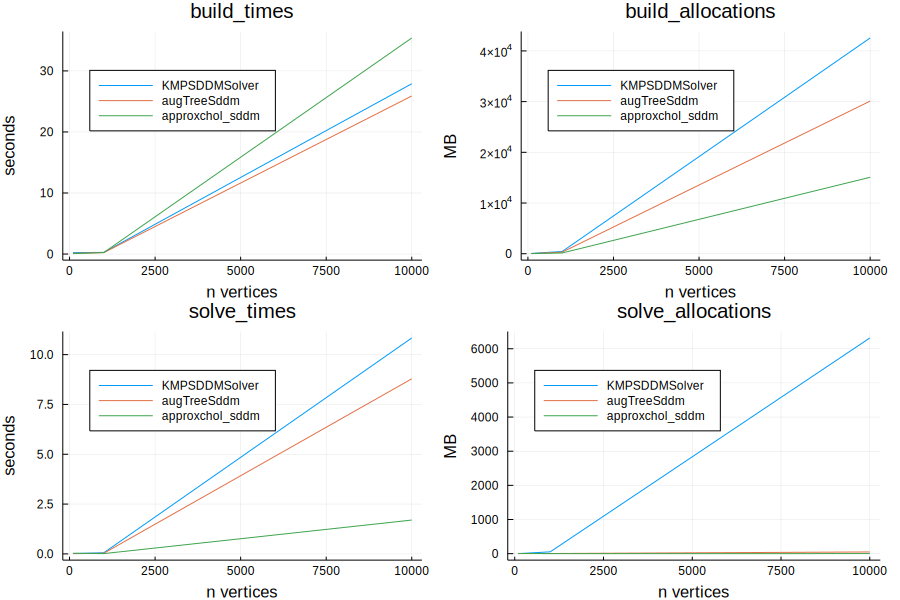

In [8]:
matrix_sizes = Array{Int64}([1e2, 1e3, 1e4])
benchmark_sddm(matrix_sizes, 0.7)

### SDDM solver, sparse matrices (10% non-zeros)

======= Graph size: 100 x 100 =======
======= Solver Laplacians.augTreeSddm =======
Solver build time: 0.001 seconds.
PCG stopped after: 0.0 seconds and 27 iterations with relative error 9.641246466748304e-7.
Relative norm: 9.641246466556372e-7
Solver build time: 0.001 seconds.
PCG stopped after: 0.0 seconds and 26 iterations with relative error 7.674793386857193e-7.
Relative norm: 7.674793386845268e-7
Solver build time: 0.001 seconds.
PCG stopped after: 0.0 seconds and 27 iterations with relative error 6.162744880368484e-7.
Relative norm: 6.162744880074152e-7
Solver build time: 0.001 seconds.
PCG stopped after: 0.0 seconds and 26 iterations with relative error 9.070238117015754e-7.
Relative norm: 9.070238116831345e-7
Solver build time: 0.001 seconds.
PCG stopped after: 0.0 seconds and 27 iterations with relative error 5.669908792711686e-7.
Relative norm: 5.66990879214895e-7
Build time: 0.001, Build alloc: 0.78 MB, Solve time: 0.000, Solve alloc: 0.19 MB 

======= Solver Laplacians.KMP

PCG stopped after: 0.003 seconds and 9 iterations with relative error 6.724093706752623e-7.
Relative norm: 6.724093706414261e-7
Build time: 0.029, Build alloc: 25.16 MB, Solve time: 0.004, Solve alloc: 0.22 MB 

======= Graph size: 10000 x 10000 =======


Progress:  67%|███████████████████████████▍             |  ETA: 0:00:01

======= Solver Laplacians.augTreeSddm =======
Solver build time: 4.243 seconds.
PCG stopped after: 2.637 seconds and 267 iterations with relative error 9.86014932687483e-7.
Relative norm: 9.860149326894136e-7
Solver build time: 4.11 seconds.
PCG stopped after: 2.662 seconds and 270 iterations with relative error 9.716076636872043e-7.
Relative norm: 9.716076636814534e-7
Solver build time: 4.116 seconds.
PCG stopped after: 2.575 seconds and 262 iterations with relative error 9.473424501834489e-7.
Relative norm: 9.473424501813366e-7
Solver build time: 4.105 seconds.
PCG stopped after: 2.624 seconds and 264 iterations with relative error 9.71992947885204e-7.
Relative norm: 9.719929478757297e-7
Solver build time: 4.11 seconds.
PCG stopped after: 2.578 seconds and 262 iterations with relative error 9.874660149875026e-7.
Relative norm: 9.874660149962099e-7
Build time: 4.137, Build alloc: 4502.96 MB, Solve time: 2.616, Solve alloc: 170.06 MB 

======= Solver Laplacians.KMPSDDMSolver =======
ak

Progress: 100%|█████████████████████████████████████████| Time: 0:02:10


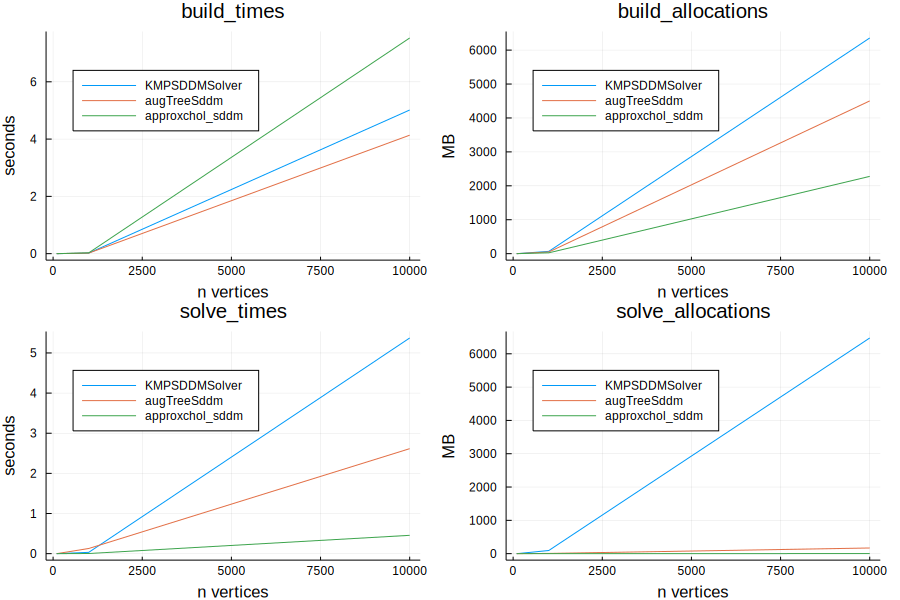

In [9]:
benchmark_sddm(matrix_sizes, 0.1)